In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd

plot_size = (15, 10)

mlo_df = pd.read_csv('data/datasets/noaa_mlo/mlo_full.csv')
mlo_df.index = pd.to_datetime(mlo_df[['year', 'month']].assign(day=1))
mlo_df = mlo_df['1976':]
mlo_df = mlo_df.drop(columns=['site'])
mlo_df

,year,month,co2_mean,ch4_mean,n2o_mean,sf6_mean,wind_direction,wind_speed,wind_steadiness,pressure,temp2m,temp10m,temp_tower,rel_humidity,precipitation_intensity
1976-07-01,1976,7,332.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,1976,8,331.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,1976,9,329.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,1976,10,329.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-11-01,1976,11,330.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020,8,NaN,NaN,NaN,NaN,144.698925,5.538844,95.385753,681.301640,9.547984,9.708199,9.364919,35.154583,0.036290
2020-09-01,2020,9,NaN,NaN,NaN,NaN,147.730556,4.146528,94.533333,681.233972,8.980139,9.550278,9.392083,35.596774,0.041667
2020-10-01,2020,10,NaN,NaN,NaN,NaN,176.219086,4.475269,93.590054,680.231976,8.025806,8.724462,8.632930,43.420680,0.048387
2020-11-01,2020,11,NaN,NaN,NaN,NaN,165.845722,5.234642,92.608333,681.288292,6.697639,7.428889,7.302361,46.822511,0.043056


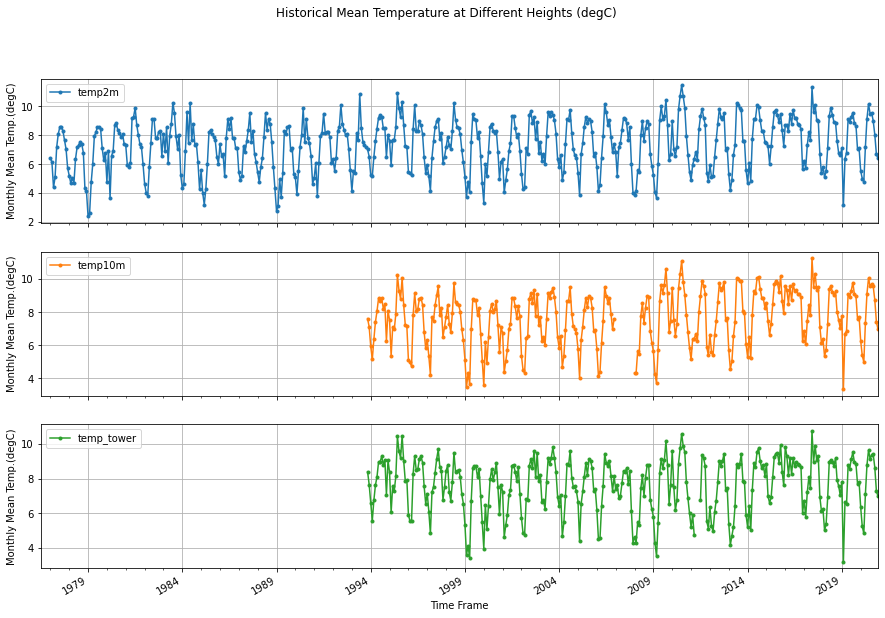

In [2]:
def plot_df(df):
    plot = df.plot(y=['temp2m', 'temp10m', 'temp_tower'], subplots=True, figsize=plot_size, marker='.', title='Historical Mean Temperature at Different Heights (degC)', grid=True)
    plot[-1].set_xlabel('Time Frame')
    plot[0].set_ylabel('Monthly Mean Temp.(degC)')
    plot[1].set_ylabel('Monthly Mean Temp.(degC)')
    plot[2].set_ylabel('Monthly Mean Temp.(degC)')
    
plot_df(mlo_df)

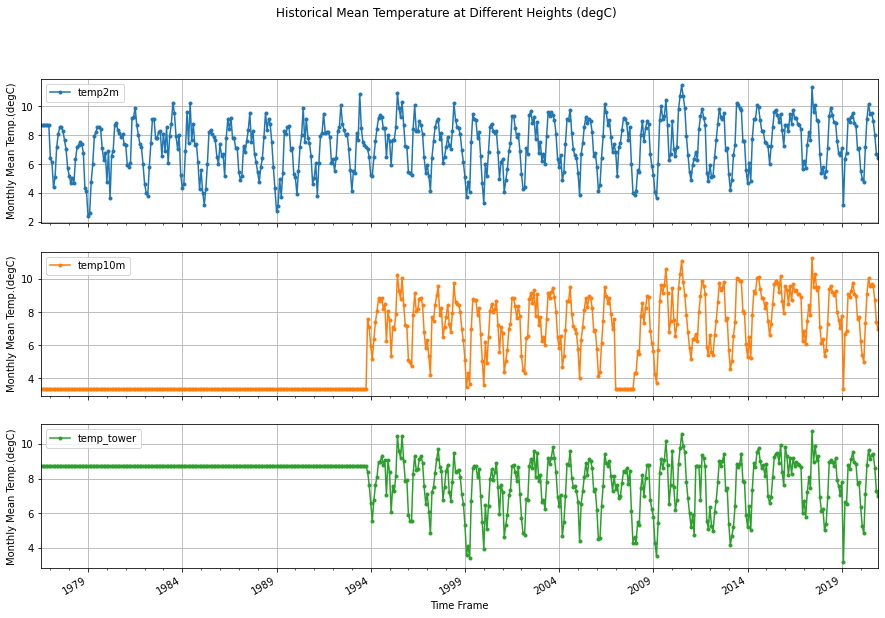

In [3]:
imputer = SimpleImputer(strategy='most_frequent')
imputed = pd.DataFrame(imputer.fit_transform(mlo_df), columns=mlo_df.columns, index=mlo_df.index)
plot_df(imputed)

C:\Users\zedla\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


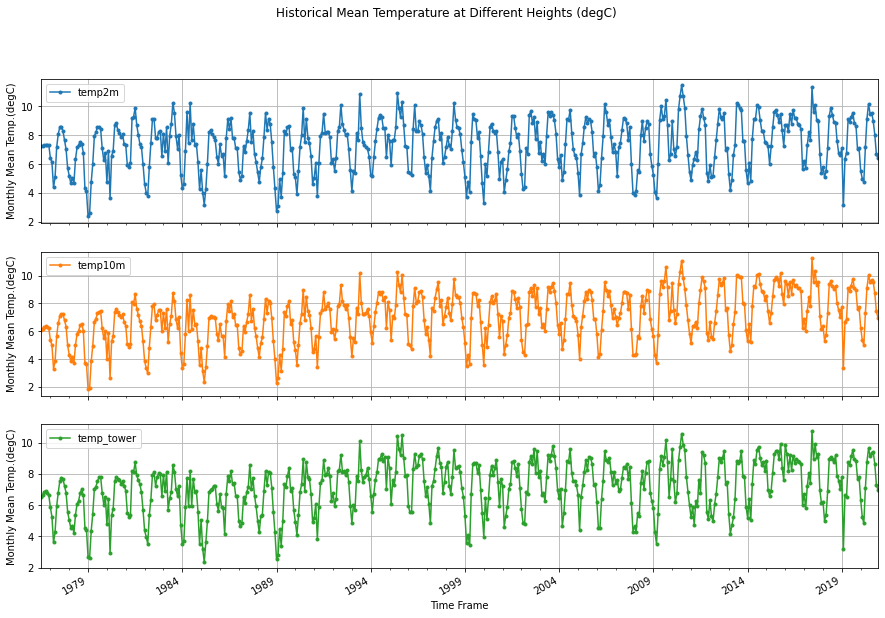

In [4]:
imputer = IterativeImputer(imputation_order='arabic')
imputed = pd.DataFrame(imputer.fit_transform(mlo_df), columns=mlo_df.columns, index=mlo_df.index)
plot_df(imputed)